In [17]:
import numpy as np

# 设置计算区域大小和网格大小
Lx, Ly = 1.0, 1.0
nx, ny = 101, 101
dx, dy = Lx / (nx - 1), Ly / (ny - 1)

In [18]:
# 定义边界条件和初始条件
u_top = 0.0
u_bottom = 0.0
u_left = 0.0
u_right = 1.0

In [19]:
u = np.zeros((ny, nx))
u[:, 0] = u_left
u[:, -1] = u_right
u[0, :] = u_bottom
u[-1, :] = u_top

In [20]:
# 定义Poisson方程的右侧项
f = np.zeros((ny, nx))
f[int(ny / 4):int(3 * ny / 4), int(nx / 4):int(3 * nx / 4)] = 1.0 / (dx * dy)

In [21]:
# 定义有限体积法的计算函数
def fvm(u, f, dx, dy):
    ny, nx = u.shape
    # 计算梯度
    ux = np.zeros((ny, nx))
    uy = np.zeros((ny, nx))
    ux[:, 1:-1] = (u[:, 2:] - u[:, :-2]) / (2.0 * dx)
    uy[1:-1, :] = (u[2:, :] - u[:-2, :]) / (2.0 * dy)
    # 计算拉普拉斯算子
    laplace = np.zeros((ny, nx))
    laplace[1:-1, 1:-1] = (u[1:-1, 2:] - 2.0 * u[1:-1, 1:-1] + u[1:-1, :-2]) / (dx * dx) + (u[2:, 1:-1] - 2.0 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / (dy * dy)
    # 计算新的解
    u_new = u + (f - laplace) * dx * dy
    return u_new

In [22]:
# 进行迭代计算
for n in range(10000):
    u = fvm(u, f, dx, dy)

C:\Users\23984\AppData\Local\Temp\ipykernel_4820\265610904.py:11: RuntimeWarning: overflow encountered in divide
  laplace[1:-1, 1:-1] = (u[1:-1, 2:] - 2.0 * u[1:-1, 1:-1] + u[1:-1, :-2]) / (dx * dx) + (u[2:, 1:-1] - 2.0 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / (dy * dy)
C:\Users\23984\AppData\Local\Temp\ipykernel_4820\265610904.py:11: RuntimeWarning: overflow encountered in add
  laplace[1:-1, 1:-1] = (u[1:-1, 2:] - 2.0 * u[1:-1, 1:-1] + u[1:-1, :-2]) / (dx * dx) + (u[2:, 1:-1] - 2.0 * u[1:-1, 1:-1] + u[:-2, 1:-1]) / (dy * dy)
C:\Users\23984\AppData\Local\Temp\ipykernel_4820\265610904.py:7: RuntimeWarning: invalid value encountered in subtract
  ux[:, 1:-1] = (u[:, 2:] - u[:, :-2]) / (2.0 * dx)
C:\Users\23984\AppData\Local\Temp\ipykernel_4820\265610904.py:8: RuntimeWarning: invalid value encountered in subtract
  uy[1:-1, :] = (u[2:, :] - u[:-2, :]) / (2.0 * dy)
C:\Users\23984\AppData\Local\Temp\ipykernel_4820\265610904.py:11: RuntimeWarning: invalid value encountered in subtract
  laplace[1

In [23]:
# 输出计算结果
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

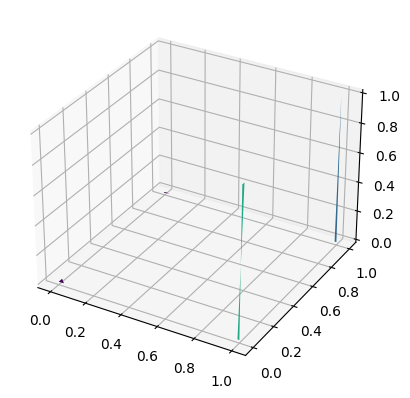

In [24]:
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
plt.show()